In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [270]:
# Function to transform each column into small capital letters
def column_into_small_letters(df):
    for column in df.columns:
        df.rename(columns = {column:column.replace(" ", "_").lower()}, inplace = True)
    return df

In [271]:
# import dataframe
df = pd.read_csv("nys_homes.csv")

In [272]:
# convert column names to lower and replace spaces with underscore
column_into_small_letters(df)

,reporting_period,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility,electric_utility,project_completion_date,customer_type,...,number_of_units,measure_type,estimated_annual_kwh_savings,estimated_annual_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_green_jobs-green_ny_free/reduced_cost_audit_(y/n),new_georeferenced_column,new_york_zip_codes_2,counties_2,nys_municipal_boundaries_2
0,2020-02-12T00:00:00.000,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16T00:00:00.000,Assisted,...,1.0,Building Shell,0,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985
1,2020-02-12T00:00:00.000,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06T00:00:00.000,Assisted,...,1.0,Building Shell,309,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631
2,2020-02-12T00:00:00.000,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15T00:00:00.000,Assisted,...,1.0,Building Shell,0,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300
3,2020-02-12T00:00:00.000,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09T00:00:00.000,Assisted,...,1.0,Building Shell,0,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989
4,2020-02-12T00:00:00.000,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08T00:00:00.000,Assisted,...,1.0,Building Shell,0,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,2020-02-12T00:00:00.000,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15T00:00:00.000,Market,...,1.0,Building Shell,0,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298
55826,2020-02-12T00:00:00.000,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28T00:00:00.000,Assisted,...,1.0,Building Shell,0,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832
55827,2020-02-12T00:00:00.000,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13T00:00:00.000,Market,...,1.0,Building Shell,0,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712
55828,2020-02-12T00:00:00.000,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26T00:00:00.000,Market,...,1.0,Building Shell,601,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545


In [282]:
# save reporting period to variable and then drop it, since there is only one
reporting_period = df["reporting_period"].unique()
df = df.drop("reporting_period", axis=1)

In [120]:
# df info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55830 entries, 0 to 55829
Data columns (total 29 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Reporting Period                                                      55830 non-null  object 
 1   Home Performance Project ID                                           55830 non-null  object 
 2   Home Performance Site ID                                              55830 non-null  object 
 3   Project County                                                        55830 non-null  object 
 4   Project City                                                          55830 non-null  object 
 5   Project Zip                                                           55830 non-null  int64  
 6   Gas Utility                                                           39852 non-null  object 


In [108]:
# replace nan in Type of Program Financing with "None"
# code not working yet. replaces all nans in the df with None
#df.loc[df["Type of Program Financing"].isna()] = "None"

## home_performance_project_id

In [281]:
# how many Site IDs have more than 1 or 2 project IDs?
over_1_project_id = (df["home_performance_project_id"].value_counts() > 1).value_counts()
over_2_project_id = (df["home_performance_project_id"].value_counts() > 2).value_counts()
df["home_performance_project_id"].value_counts()

428275          2
P00000851554    2
346123          2
387339          2
315721          2
               ..
P00000883459    1
P00000971469    1
P00001002123    1
P00000970398    1
P00000725072    1
Name: home_performance_project_id, Length: 55809, dtype: int64

## couty, city, zipcode

In [284]:
# define variables for counties, cities and zipcodes
counties = df["project_county"].unique()
cities = df["project_city"].unique()
zipcodes = df["project_zip"].unique()

## electric_utility

In [199]:
# show electric utility operators
df["electric_utility"].unique()

array(['National Grid', 'New York State Electric & Gas',
       'Rochester Gas & Electric', 'Consolidated Edison',
       'Long Island Power Authority', 'Orange & Rockland',
       'Central Hudson Gas & Electric', 'Municipal (Not Qualified)'],
      dtype=object)

## project_completion_date

In [276]:
# convert project completion date to datetime format with pandas
df["project_completion_date"] = pd.to_datetime(df["project_completion_date"])

In [277]:
# get years from Project Completion Date
df["year"] = df["project_completion_date"].apply(lambda x: x.year)

In [280]:
# How many projects per year?
df["year"].value_counts()

2016    7016
2015    6568
2019    5804
2014    5799
2011    5470
2013    5360
2017    5187
2018    5116
2012    5106
2020    3084
2010     898
2021     422
Name: year, dtype: int64

## customer_type

In [288]:
df["customer_type"].value_counts()

Market      34085
Assisted    21745
Name: customer_type, dtype: int64

## low-rise_rise_or_home_performance_indicator

In [292]:
df["low-rise_or_home_performance_indicator"].value_counts()

Home Performance    55830
Name: low-rise_or_home_performance_indicator, dtype: int64

## total project cost

In [295]:
df["total_project_cost"].describe()

count    55830.000000
mean      8572.804263
std       5582.971049
min          0.000000
25%       4700.000000
50%       7286.000000
75%      10757.000000
max      85290.000000
Name: total_project_cost, dtype: float64

In [313]:
# remove null value in total_project_cost (it's only one!)
df = df.loc[(df["total_project_cost"] != 0)]

<AxesSubplot:xlabel='total_project_cost', ylabel='Count'>

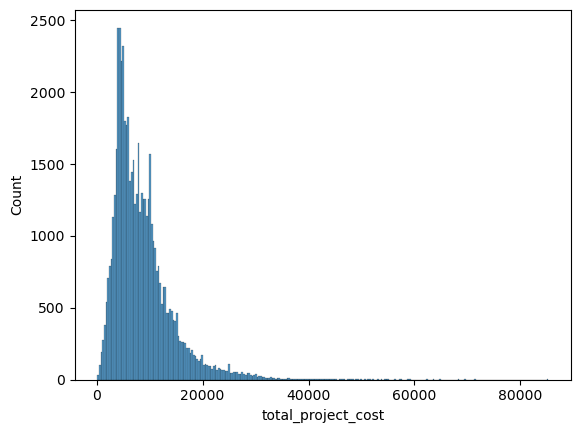

In [326]:
sns.histplot(df["total_project_cost"])

## total_incentives

In [314]:
df["total_incentives"].describe()

count    55829.000000
mean      1687.341418
std       1705.700525
min          0.000000
25%        301.000000
50%       1004.000000
75%       2899.000000
max      10000.000000
Name: total_incentives, dtype: float64

In [316]:
(df["total_incentives"]==0).value_counts()

False    44697
True     11132
Name: total_incentives, dtype: int64

<AxesSubplot:xlabel='total_incentives', ylabel='Count'>

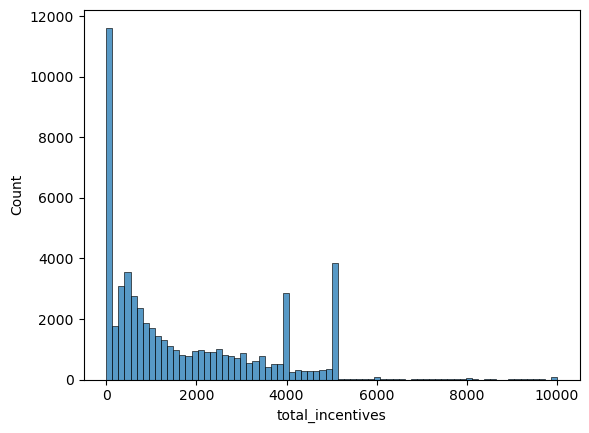

In [327]:
sns.histplot(df["total_incentives"])

## type_of_program_financing

In [318]:
df["type_of_program_financing"].value_counts()

Green Jobs - Green NY Smart Energy Loan        14474
Green Jobs - Green NY On-Bill Recovery Loan     3689
ESMART                                           219
ESTAR                                             83
Name: type_of_program_financing, dtype: int64

In [320]:
df["type_of_program_financing"].isna().value_counts()

True     37364
False    18465
Name: type_of_program_financing, dtype: int64

## amount_financed_through_program

In [323]:
df["amount_financed_through_program"].describe()

count    55829.000000
mean      2805.029107
std       5084.069034
min          0.000000
25%          0.000000
50%          0.000000
75%       4307.000000
max      25000.000000
Name: amount_financed_through_program, dtype: float64

<AxesSubplot:xlabel='amount_financed_through_program', ylabel='Count'>

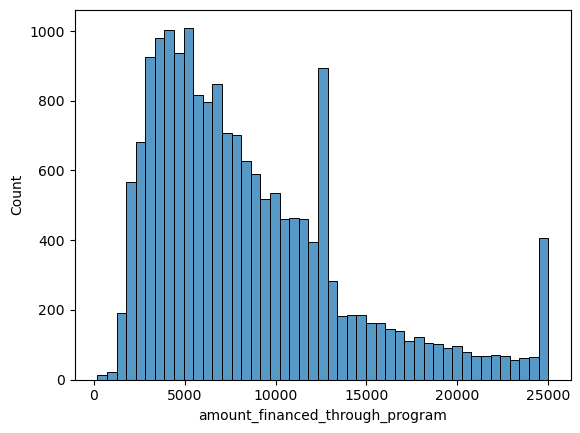

In [337]:
# histogram of all non-zero values in amount_financed_through_program
sns.histplot(df["amount_financed_through_program"].loc[df["amount_financed_through_program"] != 0])

## year_home_built

In [113]:
# drop all rows where Year Built == nan (drops around 20.000 rows)
df = df.loc[df["year_home_built"].notna()]

In [353]:
# google says "latitude and longitude" --> change order
df["new_georeferenced_column"][0]

"{'type': 'Point', 'coordinates': [-75.16936, 43.241398]}"